<a href="https://colab.research.google.com/github/QuantumPower4/MetodosComputacionales20231/blob/main/MetropolisGaussiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy             as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib          import rc
from matplotlib          import cm

import pandas as pd
import corner

import os
import os.path as path
import wget

from tqdm import tqdm

import emcee

from scipy.integrate import dblquad
from scipy.integrate import quad
# Descargamos data
if not path.exists('Data'):
    os.mkdir('Data')

!rm Data/*

file = 'Data/Gaussiana.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Gaussiano.csv'
#url = 'https://raw.githubusercontent.com/asegura4488/DataBase/main/MetodosComputacionales/Likelihood.dat'
if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

def LogPrior(p):

    mu, sigma = p

    if 3 <= mu <= 5. and 0.5 <= sigma <= 3.5:
        return 0.
    else:
        return -np.inf
def Gauss(p,x):

    mu, sigma = p

    return np.exp( -0.5*(x-mu)**2/sigma**2  )/np.sqrt(2*np.pi*sigma**2)
def Likelihood(p,x):
    return Gauss(p,x)

def JointLikelihood(p,x):
  return np.sum(np.log(Likelihood(p,x)))


def LogPosterior(p,x):

    LogP = LogPrior(p)

    if not np.isfinite(LogP):
        return -np.inf
    else:
        return JointLikelihood(p,x) + LogP

File loaded


In [ ]:
data = pd.read_csv(Path_)
X = data.x

In [ ]:
pip install emcee

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install corner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
n_walkers, n_params = 5,2
p0 = np.zeros((n_walkers, n_params))
p0[:,0] = 2.
p0[:,1] = 2.

p0 += np.random.rand(n_walkers,n_params)

In [ ]:
p0

array([[2.57457714, 2.59508484],
       [2.15753327, 2.5392025 ],
       [2.56776424, 2.63147819],
       [2.9719608 , 2.23428489],
       [2.4176083 , 2.79015455]])

In [ ]:
sampler = emcee.EnsembleSampler(n_walkers,n_params,LogPosterior,args=[X])

In [ ]:
pos,prob,state = sampler.run_mcmc(p0,5000,progress=True)

  0%|          | 0/5000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 5000/5000 [00:35<00:00, 141.32it/s]


Text(0.5, 0, 'step number')

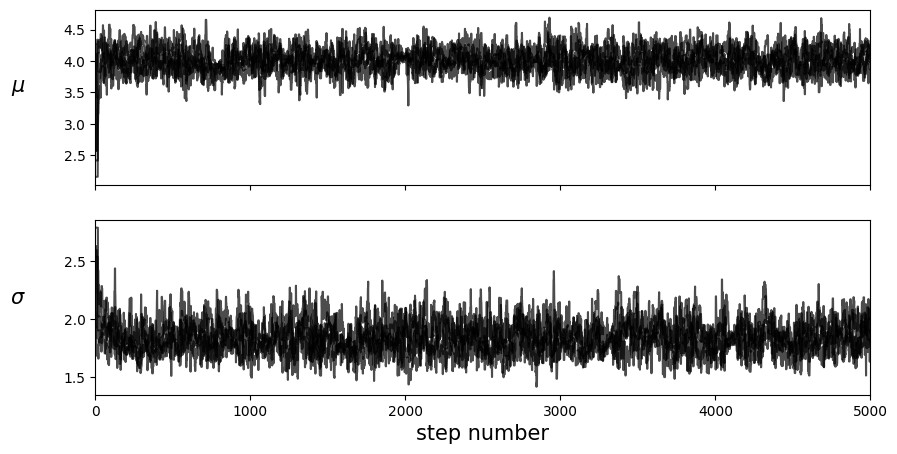

In [ ]:

fig, axes = plt.subplots(n_params, figsize=(10, 5), sharex=True)

samples = sampler.get_chain()
labels = ["$\mu$","$\sigma$"]

for i in range(n_params):

    ax = axes[i]
    ax.plot(samples[:,:,i], "k", alpha=0.7)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i],rotation=0, fontsize=15)
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number",fontsize=15)

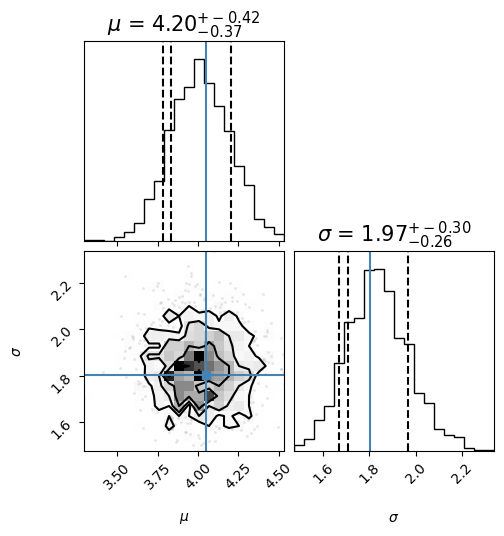

In [ ]:
flat_samples = sampler.get_chain(discard=1000, thin=15, flat=True)

truths = np.percentile(pos, 50, axis=0)
figure = corner.corner(flat_samples,
                       truths=truths,
                       labels=labels,
                       quantiles=[0.16,0.84,0.1],
                       show_titles=True,
                       title_kwargs={"fontsize":15})

In [ ]:
# HPÑA HPÑADPOKSADSOKA ADASJIDKD FKAMFDOSAKDPDOSA